# 深度學習(Deep Learning)
本章節分成三大段落  
1. 自動微分
2. 簡單線性回歸
3. 使用Tensorflow 進行數字0~9辨識

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## 一、自動微分

### 1. 利用tenosrflow 
[資料來源](https://ithelp.ithome.com.tw/articles/10233555)  
方程式: $y = X^2$   
使用套件: tensorflow   
資料為numpy，但須轉為tensorflow資料型態

In [2]:
import numpy as np 
import tensorflow as tf 

# x 宣告為 tf.constant，就要加 g.watch(x)
x = tf.Variable(3.0)

# 自動微分: 使用tensorflow進行一皆導數
with tf.GradientTape() as g:
    #g.watch(x)
    y = x * x
    
# g.gradient(y, x) 取得梯度，Y對x作微分
dy_dx = g.gradient(y, x) # Will compute to 6.0

# 轉換為 NumPy array 格式，方便顯示
print(dy_dx.numpy())

6.0


### 2. 利用Pytoch 進行自動微分與梯度下降
需先安裝Pytoch，[參考網址](https://pytorch.org/get-started/locally/) 

In [3]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y=x*x

# 反向傳導
y.backward()

print(x.grad)

tensor(6.)


## 二.利用tensorflow進行簡單迴歸
需先安裝套件，詳細安裝方法可[參考網站](https://ithelp.ithome.com.tw/articles/10233272)  

屬於神經網路中的神經層程式碼  
若要改變神經層可以套用此公式  

### 1.利用線性隨機取分別X與y 0~50之100個數據，進行簡單回歸

Epoch 0: Loss: 838.2684936523438
Epoch 1: Loss: 593.7930297851562
Epoch 2: Loss: 425.934326171875
Epoch 3: Loss: 310.68133544921875
Epoch 4: Loss: 231.5476531982422
Epoch 5: Loss: 177.2138214111328
Epoch 6: Loss: 139.90771484375
Epoch 7: Loss: 114.29292297363281
Epoch 8: Loss: 96.70549774169922
Epoch 9: Loss: 84.62967681884766
Epoch 10: Loss: 76.33819580078125
Epoch 11: Loss: 70.6450424194336
Epoch 12: Loss: 66.7359390258789
Epoch 13: Loss: 64.0517578125
Epoch 14: Loss: 62.208621978759766
Epoch 15: Loss: 60.94295883178711
Epoch 16: Loss: 60.073787689208984
Epoch 17: Loss: 59.47685623168945
Epoch 18: Loss: 59.066837310791016
Epoch 19: Loss: 58.78515625
Epoch 20: Loss: 58.59159851074219
Epoch 21: Loss: 58.45854949951172
Epoch 22: Loss: 58.36703109741211
Epoch 23: Loss: 58.30404281616211
Epoch 24: Loss: 58.2606315612793
Epoch 25: Loss: 58.23067855834961
Epoch 26: Loss: 58.20994186401367
Epoch 27: Loss: 58.195560455322266
Epoch 28: Loss: 58.185523986816406
Epoch 29: Loss: 58.17847061157226

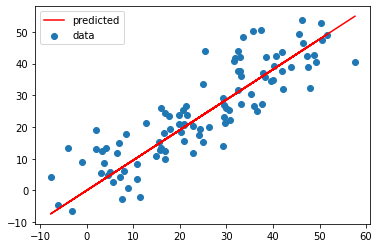

In [4]:
import numpy as np 
import tensorflow as tf 

# y_pred = W*X + b，W與b可以隨意設定
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))  #MSE公式

# 定義預測值
def predict(X):
    return W * X + b
    
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0
    # 執行訓練
    for epoch in range(epochs):
        with tf.GradientTape() as t:   # 梯度下降
            t.watch(tf.constant(X))    # X變數設定為常數constant需加入watch
            current_loss = loss(y, predict(X))

        # 取得 W, b 個別的梯度
        dW, db = t.gradient(current_loss, [W, b])
        
        # 更新權重
        # 新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        W.assign_sub(lr * dW) # W -= lr * dW
        b.assign_sub(lr * db)

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 


# 產生隨機資料
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

# reset W,b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# W、b 的最佳解
print(W.numpy(), b.numpy())

import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()

## 三、TF sample 辨識0~9的數字
由Tensorflow官網提供程式碼  
從參考網站複製程式碼，[參考網站](https://www.tensorflow.org/overview/?hl=zh_tw) 
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample2.png?raw=true)

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#特徵工程: (X-min)/(255-0)常態化
x_train, x_test = x_train / 255.0, x_test / 255.0
 
#套入模型: Deep Learning，註解1
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

'''參數可以改動
    optimizer 優化器，本程式指定adam
    loss 損失率
    metrics 準確率
    (註解2)
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


   1/1875 [..............................] - ETA: 0s - loss: 2.2652 - accuracy: 0.0938

  88/1875 [>.............................] - ETA: 1s - loss: 1.0535 - accuracy: 0.6850

 179/1875 [=>............................] - ETA: 0s - loss: 0.7859 - accuracy: 0.7690

 267/1875 [===>..........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.8021

 359/1875 [====>.........................] - ETA: 0s - loss: 0.5959 - accuracy: 0.8243

 451/1875 [======>.......................] - ETA: 0s - loss: 0.5523 - accuracy: 0.8383

 542/1875 [=======>......................] - ETA: 0s - loss: 0.5154 - accuracy: 0.8493



 631/1875 [=========>....................] - ETA: 0s - loss: 0.4889 - accuracy: 0.8573

 719/1875 [==========>...................] - ETA: 0s - loss: 0.4655 - accuracy: 0.8636

 809/1875 [===========>..................] - ETA: 0s - loss: 0.4437 - accuracy: 0.8706

 901/1875 [=============>................] - ETA: 0s - loss: 0.4290 - accuracy: 0.8752



 986/1875 [==============>...............] - ETA: 0s - loss: 0.4138 - accuracy: 0.8797

1074/1875 [================>.............] - ETA: 0s - loss: 0.4026 - accuracy: 0.8830

1161/1875 [=================>............] - ETA: 0s - loss: 0.3925 - accuracy: 0.8861

1251/1875 [===================>..........] - ETA: 0s - loss: 0.3821 - accuracy: 0.8890



1342/1875 [====================>.........] - ETA: 0s - loss: 0.3718 - accuracy: 0.8921

1435/1875 [=====================>........] - ETA: 0s - loss: 0.3616 - accuracy: 0.8951

1527/1875 [=======================>......] - ETA: 0s - loss: 0.3540 - accuracy: 0.8973

1617/1875 [========================>.....] - ETA: 0s - loss: 0.3470 - accuracy: 0.8994



1710/1875 [==========================>...] - ETA: 0s - loss: 0.3401 - accuracy: 0.9012

1801/1875 [===========================>..] - ETA: 0s - loss: 0.3334 - accuracy: 0.9031



1875/1875 [==============================] - 1s 564us/step - loss: 0.3285 - accuracy: 0.9045


Epoch 2/5
   1/1875 [..............................] - ETA: 0s - loss: 0.4735 - accuracy: 0.9375

  93/1875 [>.............................] - ETA: 0s - loss: 0.1894 - accuracy: 0.9469



 182/1875 [=>............................] - ETA: 0s - loss: 0.1912 - accuracy: 0.9459



 275/1875 [===>..........................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9489



 366/1875 [====>.........................] - ETA: 0s - loss: 0.1862 - accuracy: 0.9487

 458/1875 [======>.......................] - ETA: 0s - loss: 0.1866 - accuracy: 0.9473

 549/1875 [=======>......................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9471

 638/1875 [=========>....................] - ETA: 0s - loss: 0.1827 - accuracy: 0.9476



 730/1875 [==========>...................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9478

 823/1875 [============>.................] - ETA: 0s - loss: 0.1800 - accuracy: 0.9479

 914/1875 [=============>................] - ETA: 0s - loss: 0.1793 - accuracy: 0.9482

1007/1875 [===============>..............] - ETA: 0s - loss: 0.1811 - accuracy: 0.9477



1097/1875 [================>.............] - ETA: 0s - loss: 0.1778 - accuracy: 0.9486

1189/1875 [==================>...........] - ETA: 0s - loss: 0.1792 - accuracy: 0.9478

1282/1875 [===================>..........] - ETA: 0s - loss: 0.1773 - accuracy: 0.9484

1373/1875 [====================>.........] - ETA: 0s - loss: 0.1766 - accuracy: 0.9484



1466/1875 [======================>.......] - ETA: 0s - loss: 0.1759 - accuracy: 0.9484

1555/1875 [=======================>......] - ETA: 0s - loss: 0.1750 - accuracy: 0.9486

1648/1875 [=========================>....] - ETA: 0s - loss: 0.1741 - accuracy: 0.9490

1740/1875 [==========================>...] - ETA: 0s - loss: 0.1724 - accuracy: 0.9493



1833/1875 [============================>.] - ETA: 0s - loss: 0.1711 - accuracy: 0.9495

1875/1875 [==============================] - 1s 555us/step - loss: 0.1707 - accuracy: 0.9498


Epoch 3/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1461 - accuracy: 0.9688



  90/1875 [>.............................] - ETA: 1s - loss: 0.1270 - accuracy: 0.9622



 182/1875 [=>............................] - ETA: 0s - loss: 0.1325 - accuracy: 0.9617

 274/1875 [===>..........................] - ETA: 0s - loss: 0.1335 - accuracy: 0.9608

 366/1875 [====>.........................] - ETA: 0s - loss: 0.1368 - accuracy: 0.9605



 459/1875 [======>.......................] - ETA: 0s - loss: 0.1355 - accuracy: 0.9602

 548/1875 [=======>......................] - ETA: 0s - loss: 0.1357 - accuracy: 0.9602

 638/1875 [=========>....................] - ETA: 0s - loss: 0.1357 - accuracy: 0.9607

 731/1875 [==========>...................] - ETA: 0s - loss: 0.1368 - accuracy: 0.9602



 823/1875 [============>.................] - ETA: 0s - loss: 0.1381 - accuracy: 0.9596

 914/1875 [=============>................] - ETA: 0s - loss: 0.1373 - accuracy: 0.9597

1004/1875 [===============>..............] - ETA: 0s - loss: 0.1355 - accuracy: 0.9600

1093/1875 [================>.............] - ETA: 0s - loss: 0.1345 - accuracy: 0.9604



1185/1875 [=================>............] - ETA: 0s - loss: 0.1344 - accuracy: 0.9607

1277/1875 [===================>..........] - ETA: 0s - loss: 0.1343 - accuracy: 0.9606

1369/1875 [====================>.........] - ETA: 0s - loss: 0.1334 - accuracy: 0.9609

1459/1875 [======================>.......] - ETA: 0s - loss: 0.1333 - accuracy: 0.9610



1550/1875 [=======================>......] - ETA: 0s - loss: 0.1334 - accuracy: 0.9611

1640/1875 [=========================>....] - ETA: 0s - loss: 0.1328 - accuracy: 0.9612

1731/1875 [==========================>...] - ETA: 0s - loss: 0.1311 - accuracy: 0.9618

1823/1875 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9619

1875/1875 [==============================] - 1s 558us/step - loss: 0.1306 - accuracy: 0.9618


Epoch 4/5
   1/1875 [..............................] - ETA: 0s - loss: 0.0321 - accuracy: 1.0000



  92/1875 [>.............................] - ETA: 0s - loss: 0.0984 - accuracy: 0.9704



 177/1875 [=>............................] - ETA: 0s - loss: 0.1096 - accuracy: 0.9677



 267/1875 [===>..........................] - ETA: 0s - loss: 0.1097 - accuracy: 0.9664

 358/1875 [====>.........................] - ETA: 0s - loss: 0.1129 - accuracy: 0.9659

 448/1875 [======>.......................] - ETA: 0s - loss: 0.1131 - accuracy: 0.9660

 540/1875 [=======>......................] - ETA: 0s - loss: 0.1100 - accuracy: 0.9674

 632/1875 [=========>....................] - ETA: 0s - loss: 0.1092 - accuracy: 0.9674

 725/1875 [==========>...................] - ETA: 0s - loss: 0.1093 - accuracy: 0.9673

 817/1875 [============>.................] - ETA: 0s - loss: 0.1096 - accuracy: 0.9671

 893/1875 [=============>................] - ETA: 0s - loss: 0.1078 - accuracy: 0.9679

 955/1875 [==============>...............] - ETA: 0s - loss: 0.1086 - accuracy: 0.9677

1018/1875 [===============>..............] - ETA: 0s - loss: 0.1093 - accuracy: 0.9673

1075/1875 [================>.............] - ETA: 0s - loss: 0.1099 - accuracy: 0.9671

1117/1875 [================>.............] - ETA: 0s - loss: 0.1103 - accuracy: 0.9671

1158/1875 [=================>............] - ETA: 0s - loss: 0.1108 - accuracy: 0.9672



1221/1875 [==================>...........] - ETA: 0s - loss: 0.1108 - accuracy: 0.9671

1277/1875 [===================>..........] - ETA: 0s - loss: 0.1103 - accuracy: 0.9674

1326/1875 [====================>.........] - ETA: 0s - loss: 0.1102 - accuracy: 0.9675

1389/1875 [=====================>........] - ETA: 0s - loss: 0.1097 - accuracy: 0.9674



1452/1875 [======================>.......] - ETA: 0s - loss: 0.1097 - accuracy: 0.9675

1515/1875 [=======================>......] - ETA: 0s - loss: 0.1093 - accuracy: 0.9677

1574/1875 [========================>.....] - ETA: 0s - loss: 0.1100 - accuracy: 0.9675

1636/1875 [=========================>....] - ETA: 0s - loss: 0.1098 - accuracy: 0.9675



1715/1875 [==========================>...] - ETA: 0s - loss: 0.1099 - accuracy: 0.9673

1777/1875 [===========================>..] - ETA: 0s - loss: 0.1095 - accuracy: 0.9674

1844/1875 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9674

1875/1875 [==============================] - 1s 716us/step - loss: 0.1096 - accuracy: 0.9674


Epoch 5/5


   1/1875 [..............................] - ETA: 0s - loss: 0.5312 - accuracy: 0.8750

  92/1875 [>.............................] - ETA: 0s - loss: 0.1056 - accuracy: 0.9677

 174/1875 [=>............................] - ETA: 0s - loss: 0.0973 - accuracy: 0.9713

 263/1875 [===>..........................] - ETA: 0s - loss: 0.0961 - accuracy: 0.9729



 347/1875 [====>.........................] - ETA: 0s - loss: 0.0977 - accuracy: 0.9722

 439/1875 [======>.......................] - ETA: 0s - loss: 0.0955 - accuracy: 0.9728

 531/1875 [=======>......................] - ETA: 0s - loss: 0.0924 - accuracy: 0.9736

 619/1875 [========>.....................] - ETA: 0s - loss: 0.0935 - accuracy: 0.9724



 709/1875 [==========>...................] - ETA: 0s - loss: 0.0952 - accuracy: 0.9721

 801/1875 [===========>..................] - ETA: 0s - loss: 0.0955 - accuracy: 0.9716

 894/1875 [=============>................] - ETA: 0s - loss: 0.0954 - accuracy: 0.9713

 986/1875 [==============>...............] - ETA: 0s - loss: 0.0964 - accuracy: 0.9707



1071/1875 [================>.............] - ETA: 0s - loss: 0.0956 - accuracy: 0.9709

1162/1875 [=================>............] - ETA: 0s - loss: 0.0958 - accuracy: 0.9708

1254/1875 [===================>..........] - ETA: 0s - loss: 0.0950 - accuracy: 0.9711

1346/1875 [====================>.........] - ETA: 0s - loss: 0.0957 - accuracy: 0.9710



1425/1875 [=====================>........] - ETA: 0s - loss: 0.0964 - accuracy: 0.9709

1504/1875 [=======================>......] - ETA: 0s - loss: 0.0961 - accuracy: 0.9710

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0964 - accuracy: 0.9707

1677/1875 [=========================>....] - ETA: 0s - loss: 0.0955 - accuracy: 0.9711



1766/1875 [===========================>..] - ETA: 0s - loss: 0.0962 - accuracy: 0.9712

1858/1875 [============================>.] - ETA: 0s - loss: 0.0959 - accuracy: 0.9713

1875/1875 [==============================] - 1s 575us/step - loss: 0.0960 - accuracy: 0.9712


  1/313 [..............................] - ETA: 0s - loss: 0.0910 - accuracy: 0.9688

122/313 [==========>...................] - ETA: 0s - loss: 0.1165 - accuracy: 0.9641

247/313 [======================>.......] - ETA: 0s - loss: 0.0907 - accuracy: 0.9713

313/313 [==============================] - 0s 418us/step - loss: 0.0819 - accuracy: 0.9747


[0.0818968191742897, 0.9746999740600586]

**準確度: 97.73%**

**註解1 : Deep learning模型說明:**  
![Alt text](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample.png?raw=true)

**註解2: 梯度下降法求最佳解**  
在設定input、output、隱藏層後，進行優化器、損失函數與準確度設定，正向傳導與反向傳導一次為一次epoch，如下圖  
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample3.png?raw=true)


**註解3:Tensorflow優化器**  
[參考網站址](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample4.png?raw=true)

tensorflow損失率  
[參考網站]( https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### 程式說明
[參考網址](https://ithelp.ithome.com.tw/articles/10233758)  
神經網路演算法依舊採用機器學習8大步驟
1. 收集資料(Dataset)
2. 清理資料(Data cleaning)  
3. 特徵工程(Feature Engineerin)
4. 資料分割為訓練組與測試組(Split)  
5. 選擇演算法(Learning Algorithm)  
6. 訓練模型(Train Model)  
7. 打分數(Score Model)  
8. 評估模型(Evalute Model)

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [7]:
# 匯入 MNIST 手寫阿拉伯數字 ，併分割資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

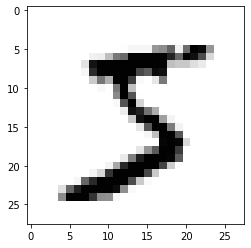

In [10]:
# 查看原始影像
import matplotlib.pyplot as plt 
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [11]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0

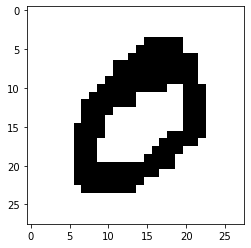

In [13]:
# 使用matplotlib.pyplot將陣列轉成圖片
img = data.reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [14]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2) #訓練時，分割出驗證資料(validation_split)20%

Epoch 1/5


   1/1500 [..............................] - ETA: 0s - loss: 2.4639 - accuracy: 0.0625

  80/1500 [>.............................] - ETA: 0s - loss: 1.1017 - accuracy: 0.6766

 152/1500 [==>...........................] - ETA: 0s - loss: 0.8184 - accuracy: 0.7605

 227/1500 [===>..........................] - ETA: 0s - loss: 0.6873 - accuracy: 0.8002

 302/1500 [=====>........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.8210

 378/1500 [======>.......................] - ETA: 0s - loss: 0.5627 - accuracy: 0.8370

 453/1500 [========>.....................] - ETA: 0s - loss: 0.5195 - accuracy: 0.8500

 532/1500 [=========>....................] - ETA: 0s - loss: 0.4890 - accuracy: 0.8596

 612/1500 [===========>..................] - ETA: 0s - loss: 0.4631 - accuracy: 0.8674

 679/1500 [============>.................] - ETA: 0s - loss: 0.4449 - accuracy: 0.8724

 757/1500 [==============>...............] - ETA: 0s - loss: 0.4269 - accuracy: 0.8775

 837/1500 [===============>..............] - ETA: 0s - loss: 0.4125 - accuracy: 0.8812

 900/1500 [=================>............] - ETA: 0s - loss: 0.4008 - accuracy: 0.8843

 945/1500 [=================>............] - ETA: 0s - loss: 0.3938 - accuracy: 0.8863

 986/1500 [==================>...........] - ETA: 0s - loss: 0.3872 - accuracy: 0.8885

1051/1500 [====================>.........] - ETA: 0s - loss: 0.3765 - accuracy: 0.8914

1116/1500 [=====================>........] - ETA: 0s - loss: 0.3664 - accuracy: 0.8943

1185/1500 [======================>.......] - ETA: 0s - loss: 0.3573 - accuracy: 0.8971

1262/1500 [========================>.....] - ETA: 0s - loss: 0.3489 - accuracy: 0.8995

1334/1500 [=========================>....] - ETA: 0s - loss: 0.3411 - accuracy: 0.9017

1411/1500 [===========================>..] - ETA: 0s - loss: 0.3336 - accuracy: 0.9041

1487/1500 [============================>.] - ETA: 0s - loss: 0.3267 - accuracy: 0.9061

1500/1500 [==============================] - 1s 975us/step - loss: 0.3262 - accuracy: 0.9063 - val_loss: 0.1667 - val_accuracy: 0.9528


Epoch 2/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1340 - accuracy: 0.9688

  77/1500 [>.............................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9517

 154/1500 [==>...........................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9466

 232/1500 [===>..........................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9473

 311/1500 [=====>........................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9483

 387/1500 [======>.......................] - ETA: 0s - loss: 0.1705 - accuracy: 0.9505

 462/1500 [========>.....................] - ETA: 0s - loss: 0.1691 - accuracy: 0.9508

 534/1500 [=========>....................] - ETA: 0s - loss: 0.1700 - accuracy: 0.9500

 610/1500 [===========>..................] - ETA: 0s - loss: 0.1683 - accuracy: 0.9506

 678/1500 [============>.................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9511

 742/1500 [=============>................] - ETA: 0s - loss: 0.1653 - accuracy: 0.9512

 809/1500 [===============>..............] - ETA: 0s - loss: 0.1646 - accuracy: 0.9513



 875/1500 [================>.............] - ETA: 0s - loss: 0.1655 - accuracy: 0.9506

 940/1500 [=================>............] - ETA: 0s - loss: 0.1635 - accuracy: 0.9513

1007/1500 [===================>..........] - ETA: 0s - loss: 0.1631 - accuracy: 0.9516

1070/1500 [====================>.........] - ETA: 0s - loss: 0.1631 - accuracy: 0.9516



1137/1500 [=====================>........] - ETA: 0s - loss: 0.1620 - accuracy: 0.9520

1204/1500 [=======================>......] - ETA: 0s - loss: 0.1622 - accuracy: 0.9517

1270/1500 [========================>.....] - ETA: 0s - loss: 0.1626 - accuracy: 0.9515

1332/1500 [=========================>....] - ETA: 0s - loss: 0.1617 - accuracy: 0.9518



1391/1500 [==========================>...] - ETA: 0s - loss: 0.1614 - accuracy: 0.9517

1448/1500 [===========================>..] - ETA: 0s - loss: 0.1601 - accuracy: 0.9522

1500/1500 [==============================] - 1s 883us/step - loss: 0.1600 - accuracy: 0.9524 - val_loss: 0.1173 - val_accuracy: 0.9662


Epoch 3/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1322 - accuracy: 0.9375

  56/1500 [>.............................] - ETA: 1s - loss: 0.1182 - accuracy: 0.9688

 113/1500 [=>............................] - ETA: 1s - loss: 0.1124 - accuracy: 0.9696

 170/1500 [==>...........................] - ETA: 1s - loss: 0.1111 - accuracy: 0.9686

 215/1500 [===>..........................] - ETA: 1s - loss: 0.1156 - accuracy: 0.9670

 262/1500 [====>.........................] - ETA: 1s - loss: 0.1154 - accuracy: 0.9670

 307/1500 [=====>........................] - ETA: 1s - loss: 0.1171 - accuracy: 0.9657

 352/1500 [======>.......................] - ETA: 1s - loss: 0.1186 - accuracy: 0.9656



 398/1500 [======>.......................] - ETA: 1s - loss: 0.1185 - accuracy: 0.9659

 441/1500 [=======>......................] - ETA: 1s - loss: 0.1196 - accuracy: 0.9653

 484/1500 [========>.....................] - ETA: 1s - loss: 0.1214 - accuracy: 0.9646

 527/1500 [=========>....................] - ETA: 1s - loss: 0.1212 - accuracy: 0.9648



 572/1500 [==========>...................] - ETA: 0s - loss: 0.1203 - accuracy: 0.9650

 621/1500 [===========>..................] - ETA: 0s - loss: 0.1219 - accuracy: 0.9649

 670/1500 [============>.................] - ETA: 0s - loss: 0.1220 - accuracy: 0.9648

 716/1500 [=============>................] - ETA: 0s - loss: 0.1201 - accuracy: 0.9653



 761/1500 [==============>...............] - ETA: 0s - loss: 0.1195 - accuracy: 0.9655

 804/1500 [===============>..............] - ETA: 0s - loss: 0.1188 - accuracy: 0.9656

 849/1500 [===============>..............] - ETA: 0s - loss: 0.1176 - accuracy: 0.9659

 896/1500 [================>.............] - ETA: 0s - loss: 0.1181 - accuracy: 0.9659



 947/1500 [=================>............] - ETA: 0s - loss: 0.1185 - accuracy: 0.9656

 997/1500 [==================>...........] - ETA: 0s - loss: 0.1191 - accuracy: 0.9654

1048/1500 [===================>..........] - ETA: 0s - loss: 0.1205 - accuracy: 0.9648

1097/1500 [====================>.........] - ETA: 0s - loss: 0.1204 - accuracy: 0.9647



1146/1500 [=====================>........] - ETA: 0s - loss: 0.1197 - accuracy: 0.9648

1197/1500 [======================>.......] - ETA: 0s - loss: 0.1198 - accuracy: 0.9648

1248/1500 [=======================>......] - ETA: 0s - loss: 0.1196 - accuracy: 0.9652

1299/1500 [========================>.....] - ETA: 0s - loss: 0.1190 - accuracy: 0.9654



1349/1500 [=========================>....] - ETA: 0s - loss: 0.1187 - accuracy: 0.9655

1401/1500 [===========================>..] - ETA: 0s - loss: 0.1186 - accuracy: 0.9655

1452/1500 [============================>.] - ETA: 0s - loss: 0.1185 - accuracy: 0.9655

1500/1500 [==============================] - 2s 1ms/step - loss: 0.1181 - accuracy: 0.9656 - val_loss: 0.1069 - val_accuracy: 0.9676


Epoch 4/5
   1/1500 [..............................] - ETA: 0s - loss: 0.0424 - accuracy: 0.9688

  52/1500 [>.............................] - ETA: 1s - loss: 0.1046 - accuracy: 0.9663

 103/1500 [=>............................] - ETA: 1s - loss: 0.1069 - accuracy: 0.9672

 153/1500 [==>...........................] - ETA: 1s - loss: 0.0984 - accuracy: 0.9696

 202/1500 [===>..........................] - ETA: 1s - loss: 0.0947 - accuracy: 0.9717

 252/1500 [====>.........................] - ETA: 1s - loss: 0.0973 - accuracy: 0.9712



 301/1500 [=====>........................] - ETA: 1s - loss: 0.0986 - accuracy: 0.9705

 353/1500 [======>.......................] - ETA: 1s - loss: 0.0975 - accuracy: 0.9711

 407/1500 [=======>......................] - ETA: 1s - loss: 0.0979 - accuracy: 0.9711

 461/1500 [========>.....................] - ETA: 1s - loss: 0.1005 - accuracy: 0.9702

 515/1500 [=========>....................] - ETA: 0s - loss: 0.0986 - accuracy: 0.9703

 570/1500 [==========>...................] - ETA: 0s - loss: 0.0984 - accuracy: 0.9698

 621/1500 [===========>..................] - ETA: 0s - loss: 0.0984 - accuracy: 0.9698

 670/1500 [============>.................] - ETA: 0s - loss: 0.0984 - accuracy: 0.9700

 721/1500 [=============>................] - ETA: 0s - loss: 0.0976 - accuracy: 0.9703

 774/1500 [==============>...............] - ETA: 0s - loss: 0.0977 - accuracy: 0.9702

 824/1500 [===============>..............] - ETA: 0s - loss: 0.0973 - accuracy: 0.9703

 878/1500 [================>.............] - ETA: 0s - loss: 0.0981 - accuracy: 0.9701

 932/1500 [=================>............] - ETA: 0s - loss: 0.0989 - accuracy: 0.9704

 986/1500 [==================>...........] - ETA: 0s - loss: 0.0985 - accuracy: 0.9701

1036/1500 [===================>..........] - ETA: 0s - loss: 0.0984 - accuracy: 0.9700

1091/1500 [====================>.........] - ETA: 0s - loss: 0.0984 - accuracy: 0.9700

1144/1500 [=====================>........] - ETA: 0s - loss: 0.0985 - accuracy: 0.9700

1194/1500 [======================>.......] - ETA: 0s - loss: 0.0989 - accuracy: 0.9698

1242/1500 [=======================>......] - ETA: 0s - loss: 0.0991 - accuracy: 0.9698



1291/1500 [========================>.....] - ETA: 0s - loss: 0.0988 - accuracy: 0.9701

1347/1500 [=========================>....] - ETA: 0s - loss: 0.0983 - accuracy: 0.9701

1396/1500 [==========================>...] - ETA: 0s - loss: 0.0979 - accuracy: 0.9702

1452/1500 [============================>.] - ETA: 0s - loss: 0.0978 - accuracy: 0.9703

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0973 - accuracy: 0.9705 - val_loss: 0.0959 - val_accuracy: 0.9719


Epoch 5/5
   1/1500 [..............................] - ETA: 0s - loss: 0.0301 - accuracy: 1.0000

  56/1500 [>.............................] - ETA: 1s - loss: 0.0836 - accuracy: 0.9710

 111/1500 [=>............................] - ETA: 1s - loss: 0.0853 - accuracy: 0.9716

 167/1500 [==>...........................] - ETA: 1s - loss: 0.0806 - accuracy: 0.9725



 220/1500 [===>..........................] - ETA: 1s - loss: 0.0803 - accuracy: 0.9734

 276/1500 [====>.........................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9741

 331/1500 [=====>........................] - ETA: 1s - loss: 0.0759 - accuracy: 0.9751

 386/1500 [======>.......................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9741



 440/1500 [=======>......................] - ETA: 0s - loss: 0.0756 - accuracy: 0.9746

 494/1500 [========>.....................] - ETA: 0s - loss: 0.0747 - accuracy: 0.9748

 549/1500 [=========>....................] - ETA: 0s - loss: 0.0771 - accuracy: 0.9739

 604/1500 [===========>..................] - ETA: 0s - loss: 0.0768 - accuracy: 0.9742



 659/1500 [============>.................] - ETA: 0s - loss: 0.0761 - accuracy: 0.9745

 714/1500 [=============>................] - ETA: 0s - loss: 0.0769 - accuracy: 0.9744

 764/1500 [==============>...............] - ETA: 0s - loss: 0.0769 - accuracy: 0.9741

 819/1500 [===============>..............] - ETA: 0s - loss: 0.0781 - accuracy: 0.9737

 875/1500 [================>.............] - ETA: 0s - loss: 0.0782 - accuracy: 0.9738

 933/1500 [=================>............] - ETA: 0s - loss: 0.0797 - accuracy: 0.9736

 983/1500 [==================>...........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9738

1036/1500 [===================>..........] - ETA: 0s - loss: 0.0795 - accuracy: 0.9739

1085/1500 [====================>.........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9740

1102/1500 [=====================>........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9739

1125/1500 [=====================>........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9739

1152/1500 [======================>.......] - ETA: 0s - loss: 0.0797 - accuracy: 0.9740

1187/1500 [======================>.......] - ETA: 0s - loss: 0.0797 - accuracy: 0.9740

1222/1500 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9744



1258/1500 [========================>.....] - ETA: 0s - loss: 0.0783 - accuracy: 0.9745

1295/1500 [========================>.....] - ETA: 0s - loss: 0.0780 - accuracy: 0.9746

1333/1500 [=========================>....] - ETA: 0s - loss: 0.0783 - accuracy: 0.9746

1372/1500 [==========================>...] - ETA: 0s - loss: 0.0785 - accuracy: 0.9745

1409/1500 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.9744

1457/1500 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9745

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0784 - accuracy: 0.9746 - val_loss: 0.0856 - val_accuracy: 0.9742


loss、accuracy :訓練資料的損失率與正確率  
val_loss、val_accuracy: 驗證資料的損失率與正確率

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

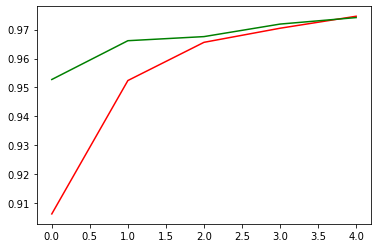

In [19]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

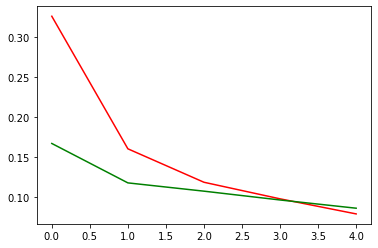

In [20]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [21]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.07689221948385239, 0.9761999845504761]

In [22]:
# 實際預測 20 筆
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


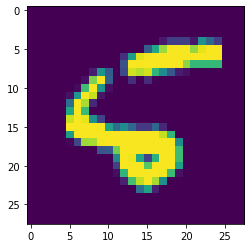

In [23]:
# 顯示錯誤的資料圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [24]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 模型存檔
model.save('model.h5')

In [26]:
# 模型載入
model = tf.keras.models.load_model('model.h5')

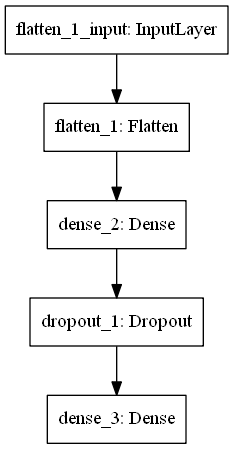

In [27]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='model.png')